### Hier Dokumentiert, was in den einzelnen Schritten gemacht wird. Einzelne Abschnitte werden mit Markdown kommentiert, damit es übersichtlicher wird. 
Die restliche Dokumentation wird über Kommentare in den Codeblöcken gemacht. 

In [1]:
#Die Libraries + Packages, die gebraucht werden, werden importiert.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy as spacy
import xlwings as xw
from collections import Counter

#Der Datensatz wird als Variable df aus der CSV importiert. 
#In diesem Datensatz werden die Inhalte mit einem Kommata getrennt. 
df = pd.read_csv("/Users/marenabele/Desktop/Data-Storytelling_2.0/Data/ted-talks.csv", sep =",")
df

#https://huppenkothen.org/data-visualization-tutorial/13-walkthrough-altair/index.html Seite für das Designen mit Altair. 
#https://altair-viz.github.io/user_guide/customization.html#user-guide-customization Seite für das Designen mit Altair.
#https://altair-viz.github.io/user_guide/configuration.html  Seite für das Designen mit Altair.
#https://www.xlwings.org Export zu Excel

ModuleNotFoundError: No module named 'pandas'

### Keywords der TED Talk Titeln // Wordcloud

##### Daten

In [120]:
#Die Daten werden aus der "Ted-Talks.ipynb" - Datei kopiert.
#Neue Packages importieren für die Analyse der Texte 
#https://damu-analytics.de/datascience/how-to-texte-mit-python-analysieren-teil-2/
#https://spacy.io/usage Installieren von Spacy
#https://blog.finxter.com/how-to-install-regex-in-python/ Installieren von Redex
import spacy as spacy
from collections import Counter

#https://damu-analytics.de/datascience/how-to-texte-mit-python-analysieren-teil-2/
df_title = df["title"]
df_title

from spacy.lang.en.examples import sentences
nlp = spacy.load("en_core_web_md")
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
import re

df["txt"] = [nlp(text) for text in df.title]

#Wie viele Wörter haben alle Titel zusammen
all_words = []
for text in df.txt:
    wordrow = [word.text for word in text]
    all_words.extend(wordrow)
print ("Anzahl an Wörtern in den Titeln:", len(all_words))

#Wie viele gleiche Wörter gibt es in den Titeln
word_freq = Counter(all_words)
print ("Wie viele gleiche Wörter gibt es in den Titeln:", len(word_freq))

common_words = word_freq.most_common(50)
#Stylen in eine Tabelle
temp = pd.DataFrame(common_words)
temp.columns = ["Wörter","Anzahl der Wörter"]
temp.style.background_gradient(cmap='Reds').hide_index()
#Wie man erkannen kann sind viele Wörter, die keine Ausagen geben dabei. Wie beispielsweise the, of, to, a aber auch Fragewörter wie how, why, what.

#Wir wollen häufig vorkommende Wörter, die nichts über den Sinn aussagen, wie "the", "a" oder Satzzeichen rausstreichen
#Text säubern von Sonderzeichen, Satzzeichen und Emojis
def clean_text(text):
    if isinstance((text), (str)):
        text = re.sub('<[^>]*>', '', text)
        text = re.sub('[\d]+', '', text.lower())
        text = re.sub('"', '', text.lower())
        text = re.sub('\[.*?\]', '', text)
        text = re.sub('https?://\S+|www\.\S+', '', text)
        text = re.sub('<.*?>+', '', text)
        text = re.sub('\n', '', text)
        text = re.sub('\w*\d\w*', '', text)
        text = re.sub('\'','', text)
        return text
    if isinstance((text), (list)):
        return_list = []
        for i in range(len(text)):
            temp_text = re.sub('<[^>]*>', '', text[i])
            temp_text = re.sub('[\d]+', '', temp_text.lower())
            temp_text = re.sub('"', '', temp_text.lower())
            temp_text = re.sub('\[.*?\]', '', temp_text)
            temp_text = re.sub('https?://\S+|www\.\S+', '', temp_text)
            temp_text = re.sub('<.*?>+', '', temp_text)
            temp_text = re.sub('\n', '', temp_text)
            temp_text = re.sub('\w*\d\w*', '', temp_text)
            temp_text = re.sub('\'','', temp_text)
            return_list.append(temp_text)
        return(return_list)
    else:
        pass

#Füllwörter entfernen
def remove_stopwords(text):
    wordrow = [word for word in text if word.is_stop != True and word.is_punct != True]
    return wordrow

# Wörter zählen, die zurück gegeben werden
def wordcounter(text):
    freq = len(text)
    return freq

#Dem Datensatz werden neue Spalten hinzugefügt. Die gefilterten Wörter, die Wörter als Keywords, wie viele Wörter es gesäubert sind und wie viele Wörter gestrichen wurden.
df["keywords"] = df['title'].apply(lambda x : clean_text(x))
df["keywords"] = [nlp(text) for text in df.keywords]

df["keywords"] = df["keywords"].apply(lambda x : remove_stopwords(x))
df['word_numb_orig'] = df['txt'].apply(lambda x : wordcounter(x))
df['word_numb_cleaned'] = df["keywords"].apply(lambda x : wordcounter(x))

#Alle Wörter angezeigt bekommen
#Wie viele Wörter, die nur min. 1x vorkommen es gibt
#Welche die meist vorkommenden Wörter sind. 
all_words = []
for text in df.keywords:
    wordrow = [word.text for word in text if word.is_stop != True and word.is_punct != True and word.text != ' ']
    all_words.extend(wordrow)
print ("Anzahl an Wörtern in den Titeln:", len(all_words))

# word count
word_freq = Counter(all_words)
print ("Wie viele gleiche Wörter gibt es in den Titeln:", len(word_freq))
word_count_clean = len(all_words)
unique_words_clean = len(word_freq)
common_words = word_freq.most_common()

# plot it for nice overview
temp = pd.DataFrame(common_words)
temp.columns = ["Wörter","Anzahl der Wörter"]
temp.style.background_gradient(cmap='Reds')

Anzahl an Wörtern in den Titeln: 41645
Wie viele gleiche Wörter gibt es in den Titeln: 7160
Anzahl an Wörtern in den Titeln: 20825
Wie viele gleiche Wörter gibt es in den Titeln: 6051


,Wörter,Anzahl der Wörter
0,life,180
1,world,149
2,nt,134
3,new,133
4,future,132
5,change,110
6,work,96
7,help,96
8,climate,91
9,art,86


##### Erstellung der Wordcloud mit wordcloud und matplotlib

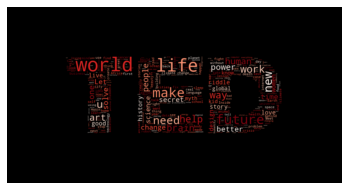

In [121]:
#Die Folgenden Wörter sollen Händisch ausgeschlossen werden, da diese in den meisten 400 Wörtern auftauchen, aber ebenfalls nichts zum Sinn des Titels aussagen:
#"nt", "s", "la", "de", "ve", "m", "l", "d", "el" 
#Teilweise spanisch, teilweise Endungen für Kursformen.
#Wordcloud erstellen: https://www.python-lernen.de/wordcloud-erstellen-python.htm
#Für Wordclouds braucht man Strings. Also muss die Tabelle erst in ein String umgewandelt werden.

#Importieren weiterer Librarier und Packages
from wordcloud import WordCloud, ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

#Da ich für die WORDCLOUD funktion einen String brauche, nehme ich die txt Spalte aus meinem Datensatz und 
#benutzte diese, da in dieser ebenfalls alle Wörter enthalten sind. 
#https://re-thought.com/creating-wordclouds-in-python/
content = " ".join(review for review in df.txt.astype(str))

#Händisches ausschließen von Wörtern, die nicht relevant sind, aber nicht in den STOPWORDS enthalten sind.
stopwords = set(STOPWORDS) 
stopwords.update(["nt", "s", "la", "de", "ve", "l", "m", "d", "el", "ld", "U", "u"])

#Hier ist die Wordcloud normal dargestellt. Möchte allerdings, dass die Wordcloud in TED Form dargestllt wird, wie das Logo.
#wordcloud = WordCloud().generate(content)
#plt.imshow(wordcloud, interpolation="bilinear")
#plt.show()
wordcloud_format = np.array(Image.open("ted-logo-fb.png"))
wordcloud = WordCloud(background_color="#000000", colormap="Reds", stopwords=STOPWORDS, mask=wordcloud_format, max_words=400, relative_scaling= 1, width=5000, height=2500).generate(content)


plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


### Korrelation zwischen Views und Likes // Scatterplot

##### Daten

In [122]:
df_views_und_likes = df[["views", "likes"]]

##### Erstellung des Scatterplots mit Altair

In [123]:
import altair as alt
alt.data_transformers.disable_max_rows()
alt.Chart(df_views_und_likes).mark_circle(color="#FF2B06").encode(
    x= alt.X(
        "views:Q", axis=alt.Axis(titleAnchor="start"), title="VIEWS"),
    y= alt.Y(
        "likes:Q", axis=alt.Axis(titleAnchor="end"), title="LIKES")
).properties(
    title = "Korrelation zwischen Views und Likes der TED Talks"  
).interactive(
).configure_axis(
    grid= False,
    labelFont = "Arial",
).configure_title(
    fontSize = 18,
    font="Arial",
    anchor="start",
    color="black",
    align="left"
)

alt.Chart(...)

### Durchschnittliche Like-Anzahl der Top 8 Autoren

##### Daten

In [124]:
#Es werden die Top 8 genommen, da danach 6 Autoren mit der gleichen Anzahl an Videos kommen und dann wären es 14.
df_top8_likes = pd.read_csv("/Users/marenabele/Desktop/Data-Storytelling_2.0/Data/Top8_Autore_Likes.csv", sep =",")
df_top8_likes

,Autor,Durchschnittliche Likes
0,Alex Gendler,126467
1,Iseult Gillespie,50330
2,Matt Walker,46528
3,Alex Rosenthal,28940
4,Elizabeth Cox,60000
5,Emma Bryce,82417
6,Daniel Finkel,78364
7,Juan Enriquez,57500


##### Erstellung des Bar Charts mit Altair

In [131]:
#Grafik erstellen als ausgefülltes Bar-Chart

bar_chart = alt.Chart(df_top8_likes).mark_bar(color= "#9a9695").encode(
    #Achsen festlegen und Daten für die Grafik + Beschriftung ausrichten +Beschriftung festlegen
    x = alt.X('Durchschnittliche Likes:Q', axis=alt.Axis(titleAnchor="start"), title="DURCHSCHNITTLICHE LIKES DES AUTORS"),
    y = alt.Y('Autor', axis=alt.Axis(titleAnchor="start"),title="AUTOR")
)

#https://altair-viz.github.io/gallery/line_chart_with_datum.html - gestrichelte Linie
#Durchschnittliche Likes für alle Videos
line = alt.Chart().mark_rule(color="#FF2B06", strokeDash=[12, 6]).encode(x=alt.datum(62608), size=alt.SizeValue(3))

alt.layer(bar_chart + line).properties(
    #Grafik-Titel einfügen
    title = "Durchschnittliche Like-Anzahl der TOP 8 Autoren", 
    #Größe festlegen
    width=600,
    height=300,
    #Grafik interaktiv
).interactive(
    #Anpassen 
).configure_axis(
    #Raster ausblenden
    grid= False,
    #Font anpassen
    labelFont = "Arial",
).configure_title(
    #Titel Font + Größe + Farbe + Ausrichtung anpassen
    fontSize = 18,
    font="Arial",
    anchor="start",
    color="black",
    align="left"
)


alt.LayerChart(...)

Bei dieser Grafik hätte ich gerne noch eine Achsenbeschriftung hinzugefügt mit DURSCHNITTLICHE LIKES ALLER VIDEOS. Außerdem hätte ich gerne zweifarbige Balken gehabt, wenn der Wert über bzw. unter dem Durcschnitt liegt.

### Durchschnittliche View-Anzahl der Top 8 Autoren

In [ ]:
#Es werden die Top 8 genommen, da danach 6 Autoren mit der gleichen Anzahl an Videos kommen und dann wären es 14.
df_top8_views = pd.read_csv("/Users/marenabele/Desktop/Data-Storytelling_2.0/Data/Top8_Autore_Views.csv", sep =",")
df_top8_views

,Autor,Durchschnittliche Views
0,Alex Gendler,4159911
1,Iseult Gillespie,1666606
2,Matt Walker,1552667
3,Alex Rosenthal,974200
4,Elizabeth Cox,1994538
5,Emma Bryce,2717167
6,Daniel Finkel,2590909
7,Juan Enriquez,1903182


##### Erstellung des Bar Charts mit Altair

In [220]:
#Grafik erstellen als ausgefülltes Bar-Chart

bar_chart = alt.Chart(df_top8_views).mark_bar(color= "#9a9695").encode(
    #Achsen festlegen und Daten für die Grafik + Beschriftung ausrichten +Beschriftung festlegen
    x = alt.X('Durchschnittliche Views:Q', axis=alt.Axis(titleAnchor="start"), title="DURCHSCHNITTLICHE VIEWS DES AUTORS"),
    y = alt.Y('Autor', axis=alt.Axis(titleAnchor="start"),title="AUTOR")
)

#https://altair-viz.github.io/gallery/line_chart_with_datum.html - gestrichelte Linie
#Durchschnittliche Likes für alle Videos
line = alt.Chart().mark_rule(color="#FF2B06", strokeDash=[12, 6]).encode(x=alt.datum(2061576), size=alt.SizeValue(3))

alt.layer(bar_chart + line).properties(
    #Grafik-Titel einfügen
    title = "Durchschnittliche View-Anzahl der TOP 8 Autoren", 
    #Größe festlegen
    width=600,
    height=300,
    #Grafik interaktiv
).interactive(
    #Anpassen 
).configure_axis(
    #Raster ausblenden
    grid= False,
    #Font anpassen
    labelFont = "Arial",
).configure_title(
    #Titel Font + Größe + Farbe + Ausrichtung anpassen
    fontSize = 18,
    font="Arial",
    anchor="start",
    color="black",
    align="left"
)

alt.LayerChart(...)

Bei dieser Grafik hätte ich gerne noch eine Achsenbeschriftung hinzugefügt mit DURSCHNITTLICHE LIKES ALLER VIDEOS. Außerdem hätte ich gerne zweifarbige Balken gehabt, wenn der Wert über bzw. unter dem Durcschnitt liegt.

### Verteilung der veröffentlichten TED Talks nach Monat und Jahr der letzten 5 Jahre

### Daten

In [202]:
#Hier weiter machen CSV-Datei ist schon expotiert. Jahre Filtern auf dem Grünen Blog mit Values von 2017- 2022. Das seperieren als extra Datensatz und davon den Mean als Durchschnitt
#Der Datensatz für diese Grafik wird als Variable df aus der CSV importiert. 
#In diesem Datensatz werden die Inhalte mit einem Kommata getrennt. 
df_count_month_and_year = pd.read_csv("/Users/marenabele/Desktop/Data-Storytelling_2.0/Data/count_month_and_year.csv", sep =",")
df_count_month_and_year.rename(columns={"date": "Monat und Jahr", "0": "Anzahl der Videos"}, inplace=True)

from datetime import datetime, timedelta
df_count_month_and_year["Monat und Jahr"] = pd.to_datetime(df_count_month_and_year["Monat und Jahr"]).dt.strftime("%Y-%m")

#Auf die letzten 5 Jahre filtern 
#https://www.delftstack.com/de/howto/python-pandas/how-to-filter-dataframe-rows-based-on-column-values-in-pandas/
jahre_2017_bis_2021 = [
"2017-01", "2017-02", "2017-03", "2017-04", "2017-05", "2017-06", "2017-07", "2017-08", "2017-09", "2017-10", "2017-11", "2017-12",
"2018-01", "2018-02", "2018-03", "2018-04", "2018-05", "2018-06", "2018-07", "2018-08", "2018-09", "2018-10", "2018-11", "2018-12",
"2019-01", "2019-02", "2019-03", "2019-04", "2019-05", "2019-06", "2019-07", "2019-08", "2019-09", "2019-10", "2019-11", "2019-12",
"2020-01", "2020-02", "2020-03", "2020-04", "2020-05", "2020-06", "2020-07", "2020-08", "2020-09", "2020-10", "2020-11", "2020-12",
"2021-01", "2021-02", "2021-03", "2021-04", "2021-05", "2021-06", "2021-07", "2021-08", "2021-09", "2021-10", "2021-11", "2021-12"]

df_count_month_and_year_5_jahre = df_count_month_and_year[df_count_month_and_year["Monat und Jahr"].isin(jahre_2017_bis_2021)]
print(df_count_month_and_year_5_jahre)

durchschnittliche_videos_monat_5_jahre = df_count_month_and_year_5_jahre["Anzahl der Videos"].mean().__round__()

print("Es wurden in den letzten 5 Jahren durchschnittlich", durchschnittliche_videos_monat_5_jahre, "Videos im Monat veröffentlciht.")

    Monat und Jahr  Anzahl der Videos
0          2018-04                127
1          2019-04                124
2          2017-04                123
3          2018-11                115
4          2017-11                109
5          2020-10                 97
15         2021-10                 72
19         2020-06                 67
25         2019-07                 58
26         2019-12                 56
27         2017-08                 56
28         2021-08                 55
29         2019-11                 54
31         2019-09                 52
33         2020-11                 48
37         2019-05                 46
38         2018-10                 46
39         2020-05                 46
41         2020-03                 44
43         2020-02                 43
45         2017-12                 42
51         2021-05                 40
53         2017-10                 38
55         2018-12                 37
56         2018-06                 37
59         2

### Erstellung des Line Charts mit Altair

In [203]:
alt.Chart(df_count_month_and_year_5_jahre).mark_line(color="#FF2B06").encode(
    #Achsen festlegen und Daten für die Grafik + Beschriftung ausrichten +Beschriftung festlegen 
    #+ Drehen der Beschriftung der x-Achse
    x = alt.X("Monat und Jahr", axis=alt.Axis(titleAnchor="start", labelAngle=360), title="JAHR"),
    y = alt.Y("Anzahl der Videos", axis=alt.Axis(titleAnchor="end"),title="ANZAHL DER VIDEOS")
)


alt.Chart(...)

##### Da die Grafik viel zu groß werden würde, werde ich jetzt doch die Grafik für jedes Jahr der letzten 5 Jahre erstellen

In [227]:
#Hier weiter machen CSV-Datei ist schon expotiert. Jahre Filtern auf dem Grünen Blog mit Values von 2017- 2022. Das seperieren als extra Datensatz und davon den Mean als Durchschnitt
#Der Datensatz für diese Grafik wird als Variable df aus der CSV importiert. 
#In diesem Datensatz werden die Inhalte mit einem Kommata getrennt. 
df_count_month_and_year = pd.read_csv("/Users/marenabele/Desktop/Data-Storytelling_2.0/Data/count_month_and_year.csv", sep =",")
df_count_month_and_year.rename(columns={"date": "Monat und Jahr", "0": "Anzahl der Videos"}, inplace=True)

from datetime import datetime, timedelta
df_count_month_and_year["Monat und Jahr"] = pd.to_datetime(df_count_month_and_year["Monat und Jahr"]).dt.strftime("%Y-%m")

#Auf die letzten 5 Jahre filtern 
#https://www.delftstack.com/de/howto/python-pandas/how-to-filter-dataframe-rows-based-on-column-values-in-pandas/
jahr_2017 = ["2017-01", "2017-02", "2017-03", "2017-04", "2017-05", "2017-06", "2017-07", "2017-08", "2017-09", "2017-10", "2017-11", "2017-12"]
jahr_2018 =["2018-01", "2018-02", "2018-03", "2018-04", "2018-05", "2018-06", "2018-07", "2018-08", "2018-09", "2018-10", "2018-11", "2018-12"]
jahr_2019 = ["2019-01", "2019-02", "2019-03", "2019-04", "2019-05", "2019-06", "2019-07", "2019-08", "2019-09", "2019-10", "2019-11", "2019-12"]
jahr_2020 =["2020-01", "2020-02", "2020-03", "2020-04", "2020-05", "2020-06", "2020-07", "2020-08", "2020-09", "2020-10", "2020-11", "2020-12"]
jahr_2021 =["2021-01", "2021-02", "2021-03", "2021-04", "2021-05", "2021-06", "2021-07", "2021-08", "2021-09", "2021-10", "2021-11", "2021-12"]


df_2017 = df_count_month_and_year[df_count_month_and_year["Monat und Jahr"].isin(jahr_2017)]
df_2018 = df_count_month_and_year[df_count_month_and_year["Monat und Jahr"].isin(jahr_2018)]
df_2019 = df_count_month_and_year[df_count_month_and_year["Monat und Jahr"].isin(jahr_2019)]
df_2020 = df_count_month_and_year[df_count_month_and_year["Monat und Jahr"].isin(jahr_2020)]
df_2021 = df_count_month_and_year[df_count_month_and_year["Monat und Jahr"].isin(jahr_2021)]


In [240]:
line17 = alt.Chart(df_2017).mark_line(color="#FF2B06").encode(
    #Achsen festlegen und Daten für die Grafik + Beschriftung ausrichten +Beschriftung festlegen 
    #+ Drehen der Beschriftung der x-Achse
    x = alt.X("Monat und Jahr", axis=alt.Axis(titleAnchor="start", labelAngle=360), title="JAHR"),
    y = alt.Y("Anzahl der Videos", axis=alt.Axis(titleAnchor="end"),title="ANZAHL DER VIDEOS")
)

line_durchschnitt = alt.Chart().mark_rule().encode(y=alt.datum(40), size=alt.SizeValue(3))

alt.layer(line17 + line_durchschnitt).properties(    
    #Grafik-Titel einfügen
    title = "Verteilung der veröffentlichten TED Talks in 2017",  
    #Größe festlegen
    width=600,
    height=300,
    #Grafik interaktiv
).configure_axis(
    #Raster ausblenden
    grid= False,
    #Font anpassen
    labelFont = "Arial"
).configure_title(
    #Titel Font + Größe + Farbe + Ausrichtung anpassen
    fontSize = 18,
    font="Arial",
    anchor="start",
    color="black",
    align="left"
).configure_rule(
    color="#9a9695"
)


alt.LayerChart(...)

In [242]:
line18 = alt.Chart(df_2018).mark_line(color="#FF2B06").encode(
    #Achsen festlegen und Daten für die Grafik + Beschriftung ausrichten +Beschriftung festlegen 
    #+ Drehen der Beschriftung der x-Achse
    x = alt.X("Monat und Jahr", axis=alt.Axis(titleAnchor="start", labelAngle=360), title="JAHR"),
    y = alt.Y("Anzahl der Videos", axis=alt.Axis(titleAnchor="end"),title="ANZAHL DER VIDEOS")
)

line_durchschnitt = alt.Chart().mark_rule().encode(y=alt.datum(40), size=alt.SizeValue(3))

alt.layer(line18 + line_durchschnitt).properties(    
    #Grafik-Titel einfügen
    title = "Verteilung der veröffentlichten TED Talks in 2018",  
    #Größe festlegen
    width=600,
    height=300,
    #Grafik interaktiv
).configure_axis(
    #Raster ausblenden
    grid= False,
    #Font anpassen
    labelFont = "Arial"
).configure_title(
    #Titel Font + Größe + Farbe + Ausrichtung anpassen
    fontSize = 18,
    font="Arial",
    anchor="start",
    color="black",
    align="left"
).configure_rule(
    color="#9a9695"
)

alt.LayerChart(...)

In [243]:
line19 = alt.Chart(df_2019).mark_line(color="#FF2B06").encode(
    #Achsen festlegen und Daten für die Grafik + Beschriftung ausrichten +Beschriftung festlegen 
    #+ Drehen der Beschriftung der x-Achse
    x = alt.X("Monat und Jahr", axis=alt.Axis(titleAnchor="start", labelAngle=360), title="JAHR"),
    y = alt.Y("Anzahl der Videos", axis=alt.Axis(titleAnchor="end"),title="ANZAHL DER VIDEOS")
)

line_durchschnitt = alt.Chart().mark_rule().encode(y=alt.datum(40), size=alt.SizeValue(3))

alt.layer(line19 + line_durchschnitt).properties(    
    #Grafik-Titel einfügen
    title = "Verteilung der veröffentlichten TED Talks in 2019",  
    #Größe festlegen
    width=600,
    height=300,
    #Grafik interaktiv
).configure_axis(
    #Raster ausblenden
    grid= False,
    #Font anpassen
    labelFont = "Arial"
).configure_title(
    #Titel Font + Größe + Farbe + Ausrichtung anpassen
    fontSize = 18,
    font="Arial",
    anchor="start",
    color="black",
    align="left"
).configure_rule(
    color="#9a9695"
)

alt.LayerChart(...)

In [244]:
line20 = alt.Chart(df_2020).mark_line(color="#FF2B06").encode(
    #Achsen festlegen und Daten für die Grafik + Beschriftung ausrichten +Beschriftung festlegen 
    #+ Drehen der Beschriftung der x-Achse
    x = alt.X("Monat und Jahr", axis=alt.Axis(titleAnchor="start", labelAngle=360), title="JAHR"),
    y = alt.Y("Anzahl der Videos", axis=alt.Axis(titleAnchor="end"),title="ANZAHL DER VIDEOS")
)

line_durchschnitt = alt.Chart().mark_rule().encode(y=alt.datum(40), size=alt.SizeValue(3))

alt.layer(line20 + line_durchschnitt).properties(    
    #Grafik-Titel einfügen
    title = "Verteilung der veröffentlichten TED Talks in 2020",  
    #Größe festlegen
    width=600,
    height=300,
    #Grafik interaktiv
).configure_axis(
    #Raster ausblenden
    grid= False,
    #Font anpassen
    labelFont = "Arial"
).configure_title(
    #Titel Font + Größe + Farbe + Ausrichtung anpassen
    fontSize = 18,
    font="Arial",
    anchor="start",
    color="black",
    align="left"
).configure_rule(
    color="#9a9695"
)

alt.LayerChart(...)

In [246]:
line21 = alt.Chart(df_2021).mark_line(color="#FF2B06").encode(
    #Achsen festlegen und Daten für die Grafik + Beschriftung ausrichten +Beschriftung festlegen 
    #+ Drehen der Beschriftung der x-Achse
    x = alt.X("Monat und Jahr", axis=alt.Axis(titleAnchor="start", labelAngle=360), title="JAHR"),
    y = alt.Y("Anzahl der Videos", axis=alt.Axis(titleAnchor="end"),title="ANZAHL DER VIDEOS")
)

line_durchschnitt = alt.Chart().mark_rule().encode(y=alt.datum(40), size=alt.SizeValue(3))

alt.layer(line21 + line_durchschnitt).properties(    
    #Grafik-Titel einfügen
    title = "Verteilung der veröffentlichten TED Talks in 2021",  
    #Größe festlegen
    width=600,
    height=300,
    #Grafik interaktiv
).configure_axis(
    #Raster ausblenden
    grid= False,
    #Font anpassen
    labelFont = "Arial"
).configure_title(
    #Titel Font + Größe + Farbe + Ausrichtung anpassen
    fontSize = 18,
    font="Arial",
    anchor="start",
    color="black",
    align="left"
).configure_rule(
    color="#9a9695"
)

alt.LayerChart(...)

Ich wollte bei all diesen Charts eine Area und keine Linie ausgeben lassen und diese dann mit DURCHSCHNITTLICHE VIDEOS PRO MONAT (in den letzten 5 Jahren) beschriften. Außerdem wollte ich die Achsenbeschriftung anders haben mit den Abschnitten pro Monat und dem Anfangsbuchstaben des Monats.

### Verteilung der veröffentlichten TED Talks der letzten 5 Jahre

### Daten

In [147]:
#Hier weiter machen CSV-Datei ist schon expotiert. Jahre Filtern auf dem Grünen Blog mit Values von 2017- 2022. Das seperieren als extra Datensatz und davon den Mean als Durchschnitt
#Der Datensatz für diese Grafik wird als Variable df aus der CSV importiert. 
#In diesem Datensatz werden die Inhalte mit einem Kommata getrennt. 
df_count_years = pd.read_csv("/Users/marenabele/Desktop/Data-Storytelling_2.0/Data/count_years.csv", sep =",")
df_count_years.rename(columns={"year": "Jahr", "0": "Anzahl der Videos"}, inplace=True)
df_count_years

#Durchschnitt für die Grafik berechnen.
durchschnittliche_videos_pro_jahr_ab_1970 = df_count_years["Anzahl der Videos"].mean()
print("Es wurden pro Jahr seit start des Datensatzes durchschnittlich", durchschnittliche_videos_pro_jahr_ab_1970.__round__(), "Videos veröffentlicht.")

#Auf die letzten 5 Jahre filtern 
#https://www.delftstack.com/de/howto/python-pandas/how-to-filter-dataframe-rows-based-on-column-values-in-pandas/
jahre_2017_bis_2021 = [2017, 2018, 2019, 2020, 2021]

df_letzten_5_jahre = df_count_years[df_count_years.Jahr.isin(jahre_2017_bis_2021)]
#print(df_letzten_5_jahre)

durchschnitlliche_videos_pro_jahr_5_jahre = df_letzten_5_jahre["Anzahl der Videos"].mean()
print("Es wurden in den letzten 5 Jahren durchschnitllich", durchschnitlliche_videos_pro_jahr_5_jahre.__round__(), "Videos pro Jahr veröffentlicht.")

#df_letzte_5_jahre_mit_durchschnitt = df_letzten_5_jahre.assign(Durchschnittlichallejahre = 181)
#df_letzte_5_jahre_mit_durchschnitt

Es wurden pro Jahr seit start des Datensatzes durchschnittlich 181 Videos veröffentlicht.
Es wurden in den letzten 5 Jahren durchschnitllich 481 Videos pro Jahr veröffentlicht.


### Erstellung des Bar Charts mit Altair

In [221]:
#Grafik erstellen als Bar-Chart
bar_chart= alt.Chart(df_letzten_5_jahre).mark_bar(color="#9a9695"
).encode(
    #Achsen festlegen und Daten für die Grafik + Beschriftung ausrichten +Beschriftung festlegen 
    #+ Drehen der Beschriftung der x-Achse
    x = alt.X('Jahr:O', axis=alt.Axis(titleAnchor="start", labelAngle=360), title="JAHR"),
    y = alt.Y('Anzahl der Videos:Q', axis=alt.Axis(titleAnchor="end"),title="ANZAHL DER VIDEOS")
)

line = alt.Chart().mark_rule(color="#FF2B06", strokeDash=[12, 6]).encode(y=alt.datum(181), size=alt.SizeValue(3))

alt.layer(bar_chart + line).properties(
    #Grafik-Titel einfügen
    title = "Verteilung aller veröffentlichten TED Talks der letzten 5 Jahre",  
    #Größe festlegen
    width=600,
    height=300,
    #Grafik interaktiv
).configure_axis(
    #Raster ausblenden
    grid= False,
    #Font anpassen
    labelFont = "Arial"
).configure_title(
    #Titel Font + Größe + Farbe + Ausrichtung anpassen
    fontSize = 18,
    font="Arial",
    anchor="start",
    color="black",
    align="left"
).interactive().configure_axisBottom(
    #Entfernen der x-Achse
    domainColor="white")

alt.LayerChart(...)

Hier hätte ich gerne noch eine Achsen-Beschriftung hinzugefügt mit DURSCHNITTLICHE VIDEOS PRO JAHR.

In [222]:
#Kopieren und durch den Durchschnitt der letzten 5 Jahre ersetzten 
#Grafik erstellen als Bar-Chart
bar_chart= alt.Chart(df_letzten_5_jahre).mark_bar().encode(
    #Achsen festlegen und Daten für die Grafik + Beschriftung ausrichten +Beschriftung festlegen 
    #+ Drehen der Beschriftung der x-Achse
    x = alt.X('Jahr:O', axis=alt.Axis(titleAnchor="start", labelAngle=360), title="JAHR"),
    y = alt.Y('Anzahl der Videos:Q', axis=alt.Axis(titleAnchor="end"),title="ANZAHL DER VIDEOS")
)

#https://altair-viz.github.io/gallery/line_chart_with_datum.html - gestrichelte Linie
line = alt.Chart().mark_rule().encode(y=alt.datum(481), size=alt.SizeValue(3))

alt.layer(bar_chart + line).properties(
    #Grafik-Titel einfügen
    title = "Verteilung aller veröffentlichten TED Talks der letzten 5 Jahre",  
    #Größe festlegen
    width=600,
    height=300
).configure_axis(
    #Raster ausblenden
    grid= False,
    #Font anpassen
    labelFont = "Arial",
).configure_title(
    #Titel Font + Größe + Farbe + Ausrichtung anpassen
    fontSize = 18,
    font="Arial",
    anchor="start",
    color="black",
    align="left"
).configure_bar(
    #Farbe der Balken
    color="#9a9695"
).configure_rule(
    #Durchschnittslinie
    color="#FF2B06", 
    strokeDash=[12, 6],
    ellipsis ="Test"
).configure_axisBottom(
    #Entfernen der x-Achse
    domainColor="white"
).interactive()

alt.LayerChart(...)

Hier hätte ich gerne noch eine Achsen-Beschriftung hinzugefügt mit DURSCHNITTLICHE VIDEOS PRO JAHR (der letzten 5 Jahre). Außerdem hätte ich die Balken gerne zweifarbig gestalten, wenn der Wert über bzw. unter dem Durchschnitt liegt.

### Verteilung aller Videos über den kompletten Zeitraum des Datensatzes in Jahren
noch eine neue Grafik erstellt. Hier sieht man schön, es ab 1970 vereinzelte Videos gibt, der richtige Anstieg ab 2002 beginnt.

### Daten

In [ ]:
#Der Datensatz für diese Grafik wird als Variable df aus der CSV importiert. 
#In diesem Datensatz werden die Inhalte mit einem Kommata getrennt. 
df_count_years = pd.read_csv("/Users/marenabele/Desktop/Data-Storytelling_2.0/Data/count_years.csv", sep =",")
df_count_years.rename(columns={"year": "Jahr", "0": "Anzahl der Videos"}, inplace=True)

### Erstellung des Step Chart mit Altair

In [132]:
#Grafik erstellen als ausgefülltes Line-Chart
alt.Chart(df_count_years).mark_area(
    #Farbe
    color= "#9a9695",
    #Eckiges Design
    interpolate='step-after',
    #Umrandung der Fläche
    line = True 
).encode(
    #Achsen festlegen und Daten für die Grafik + Beschriftung ausrichten +Beschriftung festlegen
    x = alt.X('Jahr:O', axis=alt.Axis(titleAnchor="start"), title="JAHR"),
    y = alt.Y('Anzahl der Videos:Q', axis=alt.Axis(titleAnchor="end"),title="ANZAHL DER VIDEOS")
).properties(
    #Grafik-Titel einfügen
    title = "Verteilung aller veröffentlichten TED Talks über den kompletten Zeitraum"  
    #Grafik interaktiv
).interactive(
    #Anpassen 
).configure_axis(
    #Raster ausblenden
    grid= False,
    #Font anpassen
    labelFont = "Arial",
).configure_title(
    #Titel Font + Größe + Farbe + Ausrichtung anpassen
    fontSize = 18,
    font="Arial",
    anchor="start",
    color="black",
    align="left"
    #Linie farblich anpassen
).configure_line(
    color="#FF2B06"
)

alt.Chart(...)